In [9]:
import src.framework__data_set as ds
import random
random.seed(10)

## Data Understanding
First, let's take a look at the data, and analyze the applications. As we are working with 3 different metrics (Container memory / Container CPU / Node memory), lets start with Node memory usage data:

In [10]:
hist = ds.get_amount_of_data_per_application(
    metric="node_mem",
    path_to_data="../data/"
)
print("Number of applications: ",len(hist))
print("All applications, and number of samples for each: ",hist)


Number of applications:  4
All applications, and number of samples for each:  [('moc/smaug', 313820), ('emea/balrog', 72447), ('emea/rick', 54929), ('moc/infra', 25405)]


Container memory usage data:

In [11]:
hist = ds.get_amount_of_data_per_application(
    metric="container_mem",
    path_to_data="../data/"
)
print("Number of applications: ",len(hist))
print("Example of 15 applications, and number of samples for each: ",hist[:15])

Number of applications:  417
Example of 15 applications, and number of samples for each:  [('kube-rbac-proxy', 7718487), ('cni-plugins', 3142572), ('driver-registrar', 2820695), ('oauth-proxy', 1942223), ('collector', 1701727), ('nmstate-handler', 1587755), ('keepalived', 1587373), ('node-exporter', 1586814), ('coredns', 1586715), ('whereabouts-cni-bincopy', 1586041), ('bridge-marker', 1583131), ('whereabouts-cni', 1580344), ('egress-router-binary-copy', 1578966), ('kube-multus-additional-cni-plugins', 1577492), ('coredns-monitor', 1576538)]


Container cpu usage data:

In [12]:
hist = ds.get_amount_of_data_per_application(
    metric="container_cpu",
    path_to_data="../data/"
)
print("Number of applications: ",len(hist))
print("Example of 15 applications, and number of samples for each: ",hist[:15])

Number of applications:  378
Example of 15 applications, and number of samples for each:  [('kube-rbac-proxy', 7578821), ('oauth-proxy', 1885203), ('collector', 1602125), ('coredns-monitor', 1564425), ('network-metrics-daemon', 1559549), ('nmstate-handler', 1556575), ('dns-node-resolver', 1554940), ('dns', 1554337), ('node-ca', 1552028), ('kube-multus-additional-cni-plugins', 1549615), ('network-check-target-container', 1547871), ('cni-plugins', 1546571), ('keepalived', 1545578), ('coredns', 1545393), ('node-exporter', 1545075)]


#### Data Visualization
The function below 'get_data_set' gets as an input specific 'metric', and 'application_name', and according to it, the relevant data is being searched in the json files. The function returns a dataset object, which is a glorified list of pandas dataframes with two columns, one for time and one for the sample. Let's take a look at some data.
In the following example, two plots of bridge-maker app are shown with the container cpu information

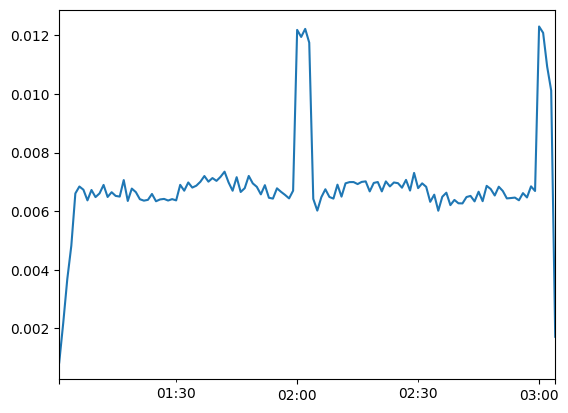

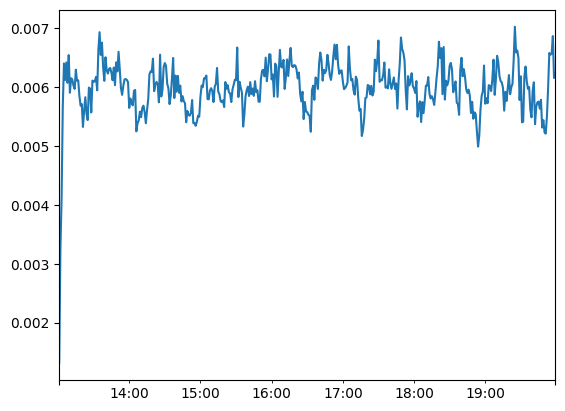

In [19]:
dataset = ds.get_data_set(
    metric="container_cpu",
    application_name="dns",
    path_to_data="../data/"
)

dataset.plot_dataset(number_of_samples=2)

As you can see the data for each application is split into different time series. Each one is continuous, and sampled every 1 minute,without interruptions during a single run.
The sampling rate can be changed, in order to get data which is easier to generalize. At the example below, the set has changed to sample every 5 minutes, and every series less than 10 samples is dropped:

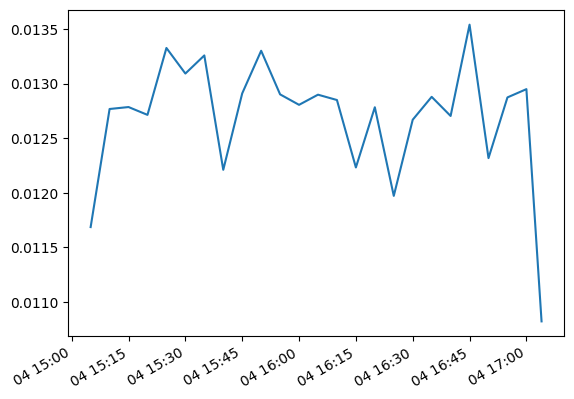

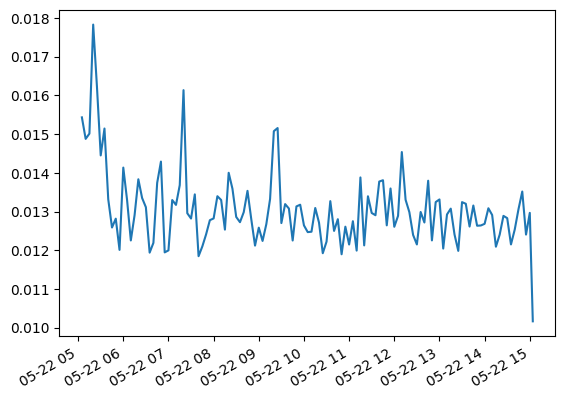

In [20]:
dataset.sub_sample_data(sub_sample_rate=5)
dataset.filter_data_that_is_too_short(data_length_limit=10)
dataset.plot_dataset(number_of_samples=2)

The data is highly variable and is not scaled, let's scale it.

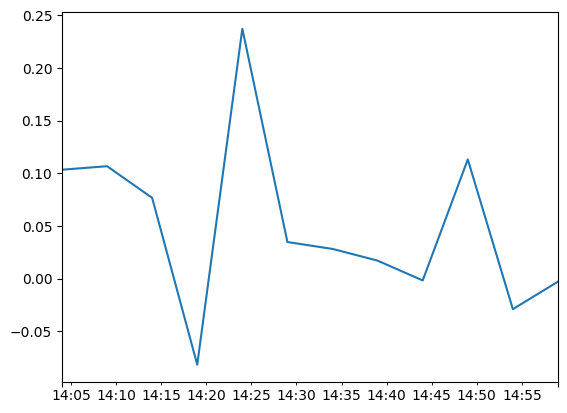

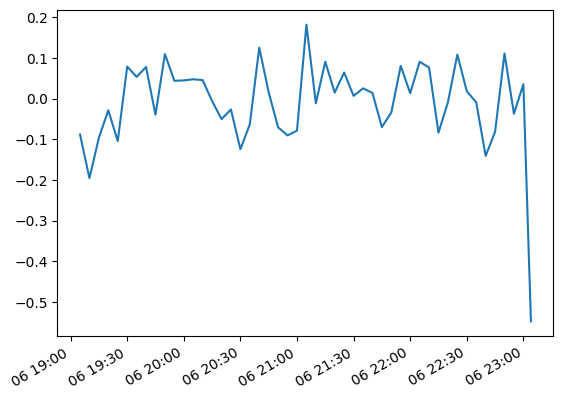

In [21]:
dataset.scale_data()
dataset.plot_dataset(number_of_samples=2)